In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

# Prepare a prediction model for profit of 50_startups data

In [13]:
data=pd.read_csv("50_Startups.csv")
data.head()

,RnDSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [9]:
data.corr()

,R&DSpend,Administration,MarketingSpend,Profit
R&DSpend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


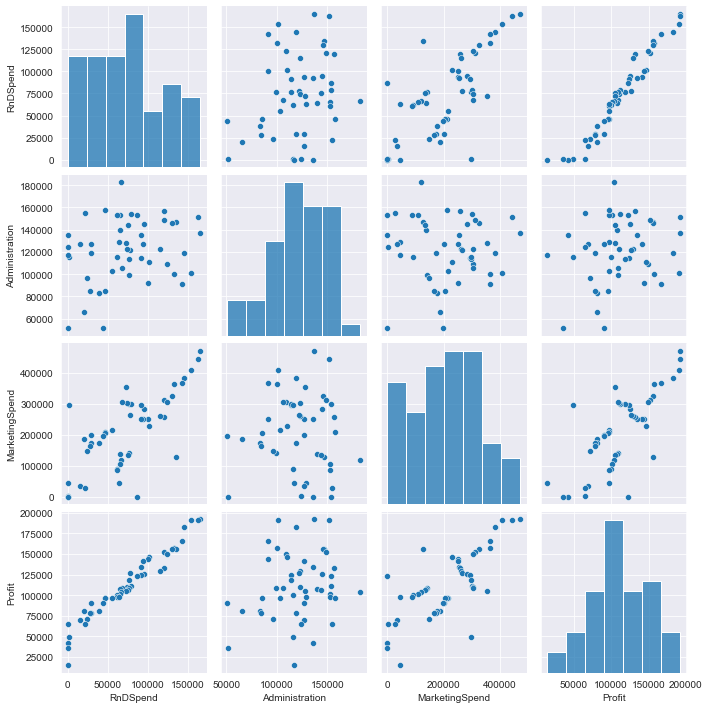

In [14]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [16]:
model=smf.ols('Profit~RnDSpend+Administration+MarketingSpend',data=data).fit()

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 25 Mar 2021   Prob (F-statistic):           4.53e-30
Time:                        12:07:32   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnDSpend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
MarketingSpend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
print(model.tvalues, '\n', model.pvalues)

Intercept          7.626218
RnDSpend          17.846374
Administration    -0.525507
MarketingSpend     1.655077
dtype: float64 
 Intercept         1.057379e-09
RnDSpend          2.634968e-22
Administration    6.017551e-01
MarketingSpend    1.047168e-01
dtype: float64


In [22]:
ml_r=smf.ols('Profit~RnDSpend',data = data).fit()  
print(ml_r.tvalues, '\n', ml_r.pvalues) 

Intercept    19.320288
RnDSpend     29.151139
dtype: float64 
 Intercept    2.782697e-24
RnDSpend     3.500322e-32
dtype: float64


In [26]:
ml_a=smf.ols('Profit~Administration',data = data).fit()  
print(ml_a.tvalues, '\n', ml_a.pvalues) 

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [27]:
ml_m=smf.ols('Profit~MarketingSpend',data = data).fit()  
print(ml_m.tvalues, '\n', ml_m.pvalues) 

Intercept         7.808356
MarketingSpend    7.802657
dtype: float64 
 Intercept         4.294735e-10
MarketingSpend    4.381073e-10
dtype: float64


In [30]:
model2=smf.ols('Profit~RnDSpend+MarketingSpend',data=data).fit()
print(model2.tvalues, '\n', model2.pvalues) 

Intercept         17.463582
RnDSpend          19.265555
MarketingSpend     1.927052
dtype: float64 
 Intercept         3.504062e-22
RnDSpend          6.040433e-24
MarketingSpend    6.003040e-02
dtype: float64


In [41]:
rsq_rnd = smf.ols('RnDSpend~Administration+MarketingSpend',data=data).fit().rsquared  
vif_rnd = 1/(1-rsq_rnd)
rsq_ad = smf.ols('Administration~RnDSpend+MarketingSpend',data=data).fit().rsquared  
vif_ad = 1/(1-rsq_ad)
rsq_mk = smf.ols('MarketingSpend~RnDSpend+Administration',data=data).fit().rsquared  
vif_mk = 1/(1-rsq_mk)
d1={'variables':['RnDSpend','Administrastion','MarketingSpend'],'VIF':[vif_rnd,vif_ad,vif_mk]}
vif_frame=pd.DataFrame(d1)
vif_frame

,variables,VIF
0,RnDSpend,2.468903
1,Administrastion,1.175091
2,MarketingSpend,2.326773


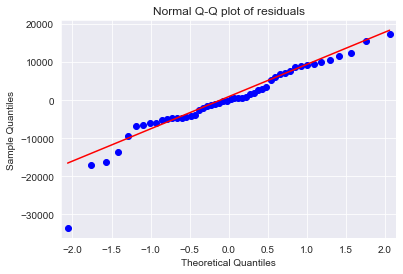

In [42]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [46]:
list(np.where(model.resid<-20000))

[array([49], dtype=int64)]

In [47]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

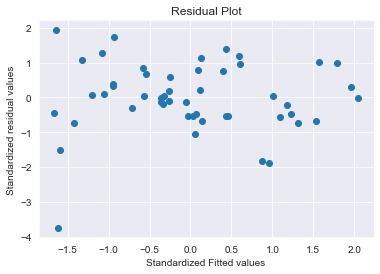

In [48]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

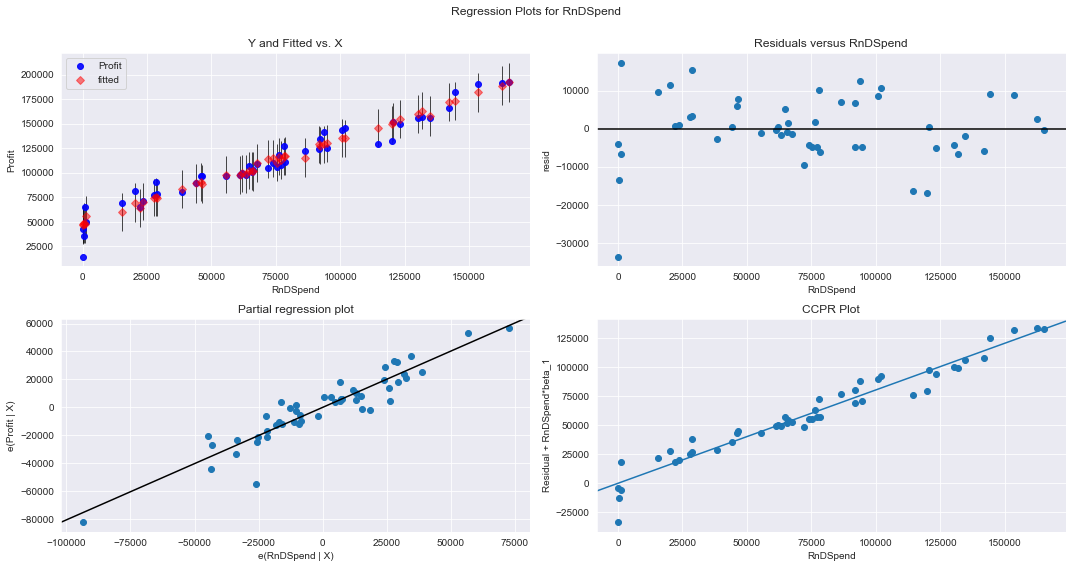

In [49]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RnDSpend", fig=fig)
plt.show()

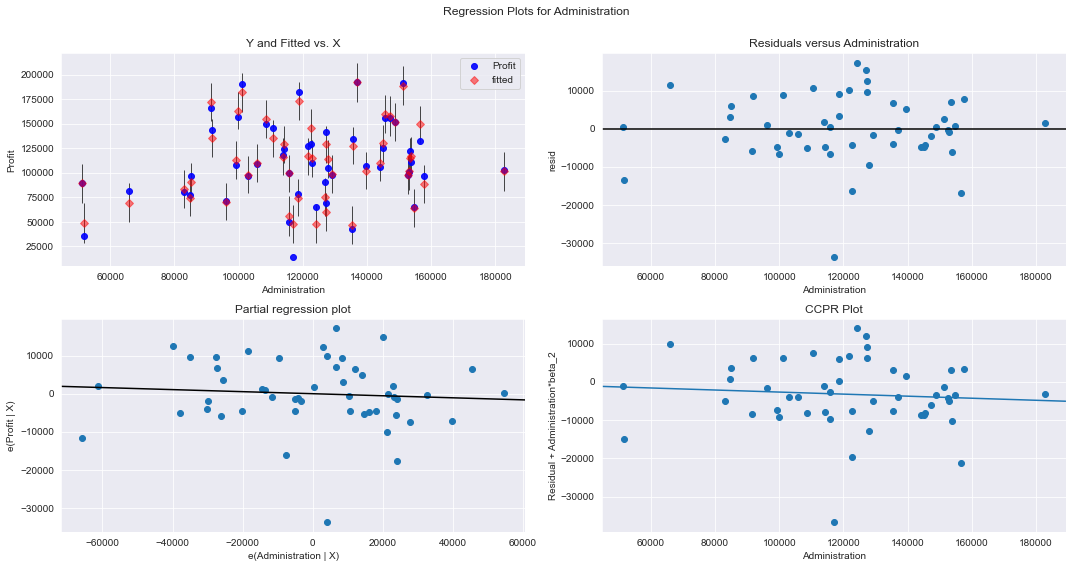

In [50]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

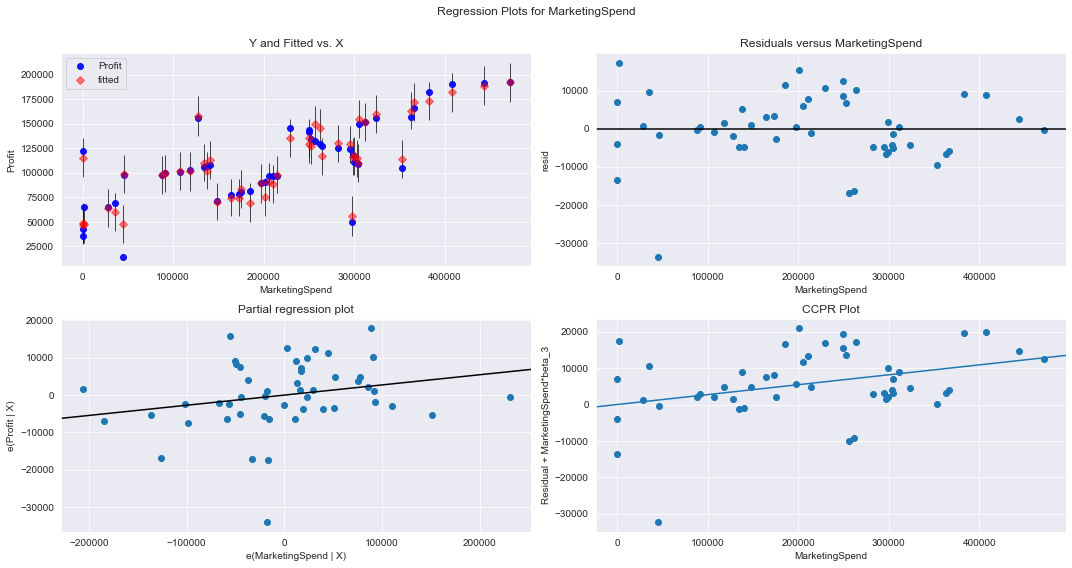

In [51]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MarketingSpend", fig=fig)
plt.show()

In [53]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [54]:
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

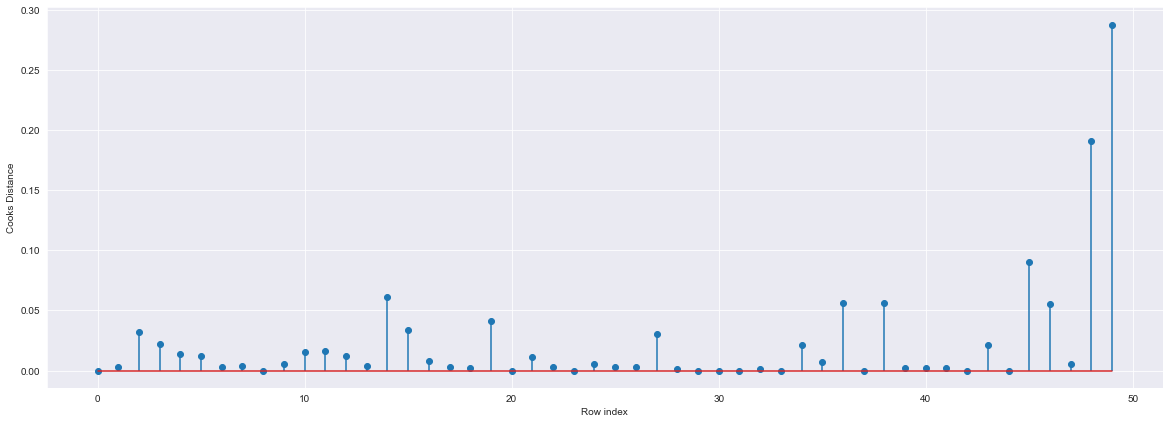

In [59]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [60]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

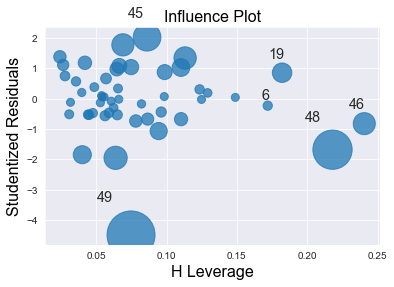

In [61]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [63]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [65]:
data[data.index.isin([49, 48])]

,RnDSpend,Administration,MarketingSpend,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [66]:
datap=pd.read_csv("50_Startups.csv")

In [67]:
datap1=datap.drop(datap.index[[49,48]],axis=0).reset_index()

In [68]:
datap1

,index,RnDSpend,Administration,MarketingSpend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [72]:
final_ml_r= smf.ols('Profit~RnDSpend+Administration',data = datap1).fit()
(final_ml_r.rsquared,final_ml_r.aic)

(0.9613542664192156, 994.3402293693792)

In [75]:
final_ml_ad= smf.ols('Profit~Administration+MarketingSpend',data = datap1).fit()
(final_ml_ad.rsquared,final_ml_ad.aic)

(0.5625802937857887, 1110.8101546830774)

In [77]:
final_ml_mk= smf.ols('Profit~RnDSpend+MarketingSpend',data = datap1).fit()
(final_ml_mk.rsquared,final_ml_mk.aic)

(0.9609119875752479, 994.886442942941)

In [78]:
model_influence_V = final_ml_r.get_influence()
(c_V, _) = model_influence_V.cooks_distance

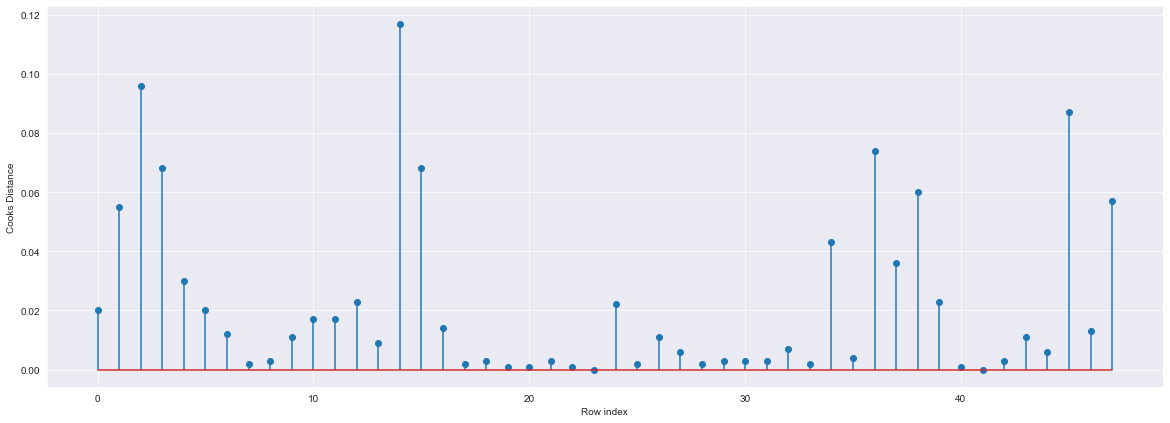

In [79]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(datap1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [80]:
(np.argmax(c_V),np.max(c_V))

(14, 0.11654464976722385)

In [82]:
datap2=datap1.drop(datap1.index[[14]],axis=0)

In [83]:
datap3=datap2.reset_index()

In [84]:
datap4=datap3.drop(['index'],axis=1)
datap4

,level_0,RnDSpend,Administration,MarketingSpend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,2,153441.51,101145.55,407934.54,Florida,191050.39
3,3,144372.41,118671.85,383199.62,New York,182901.99
4,4,142107.34,91391.77,366168.42,Florida,166187.94
5,5,131876.90,99814.71,362861.36,New York,156991.12
6,6,134615.46,147198.87,127716.82,California,156122.51
7,7,130298.13,145530.06,323876.68,Florida,155752.60
8,8,120542.52,148718.95,311613.29,New York,152211.77
9,9,123334.88,108679.17,304981.62,California,149759.96


In [85]:
final_ml_r= smf.ols('Profit~RnDSpend+Administration',data = datap4).fit()

In [88]:
model_influence_V = final_ml_r.get_influence()
(c_V, _) = model_influence_V.cooks_distance

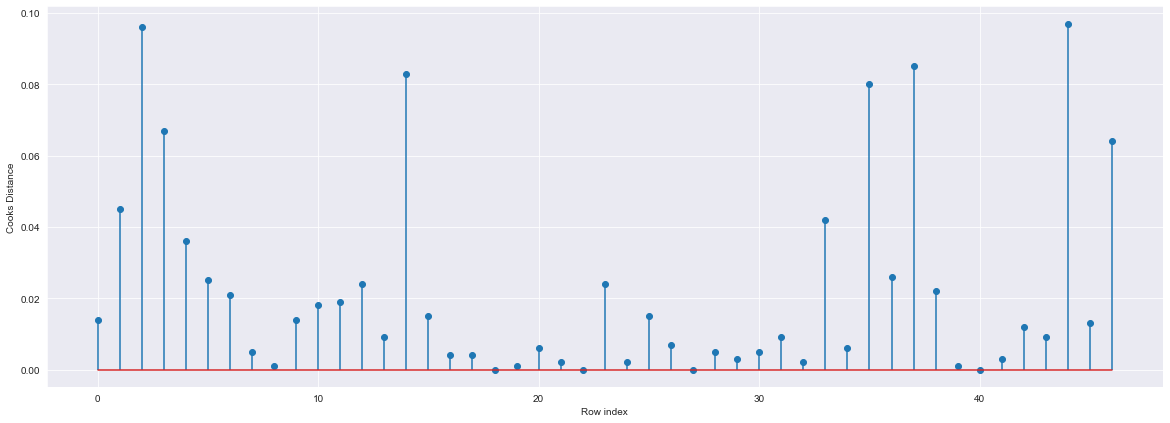

In [89]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(datap4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [90]:
(np.argmax(c_V),np.max(c_V))

(44, 0.09678650589187487)

In [91]:
new_data=pd.DataFrame({'RnDSpend':1140,"Administration":1338.95,"MarketingSpend":4565.102,},index=[1])

In [96]:
new_data1=pd.read_csv("50_Startups.csv")

In [93]:
final_ml_r.predict(new_data)

1    61593.76235
dtype: float64

In [97]:
final_ml_r.predict(new_data1.iloc[0:5,])

0    188464.428401
1    185189.563454
2    181042.426466
3    172319.779638
4    172312.705258
dtype: float64

In [100]:
pred_y = final_ml_r.predict(new_data1)

In [101]:
pred_y

0     188464.428401
1     185189.563454
2     181042.426466
3     172319.779638
4     172312.705258
5     163251.451757
6     162272.170087
7     158806.530873
8     150498.043612
9     155560.020437
10    137664.832788
11    137925.428191
12    129842.697373
13    127730.164599
14    149464.120009
15    147297.330711
16    117091.239873
17    129282.611001
18    128990.815567
19    121873.086226
20    116162.636319
21    115196.302110
22    113677.597018
23    109487.268138
24    117818.351749
25    104790.574124
26    113319.385692
27    111764.277802
28    102984.749282
29    104646.144927
30    104216.490446
31    100962.828784
32    104457.977946
33     99689.140193
34     88422.020501
35     93063.350946
36     75794.306934
37     93767.233204
38     72991.929416
39     87022.603692
40     76453.146271
41     78059.683394
42     73746.392423
43     64860.760436
44     68512.389643
45     53053.707557
46     53886.955022
47     51450.969717
48     57640.556760
49     52716.033375


# Consider only the below columns and prepare a prediction model for predicting price. Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight

In [2]:
corolla = pd.read_csv('ToyotaCorolla.csv',encoding= 'unicode_escape')
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [7]:
corolla_df = corolla[['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight']]
corolla_df.dropna()
corolla_df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [8]:
corolla_df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


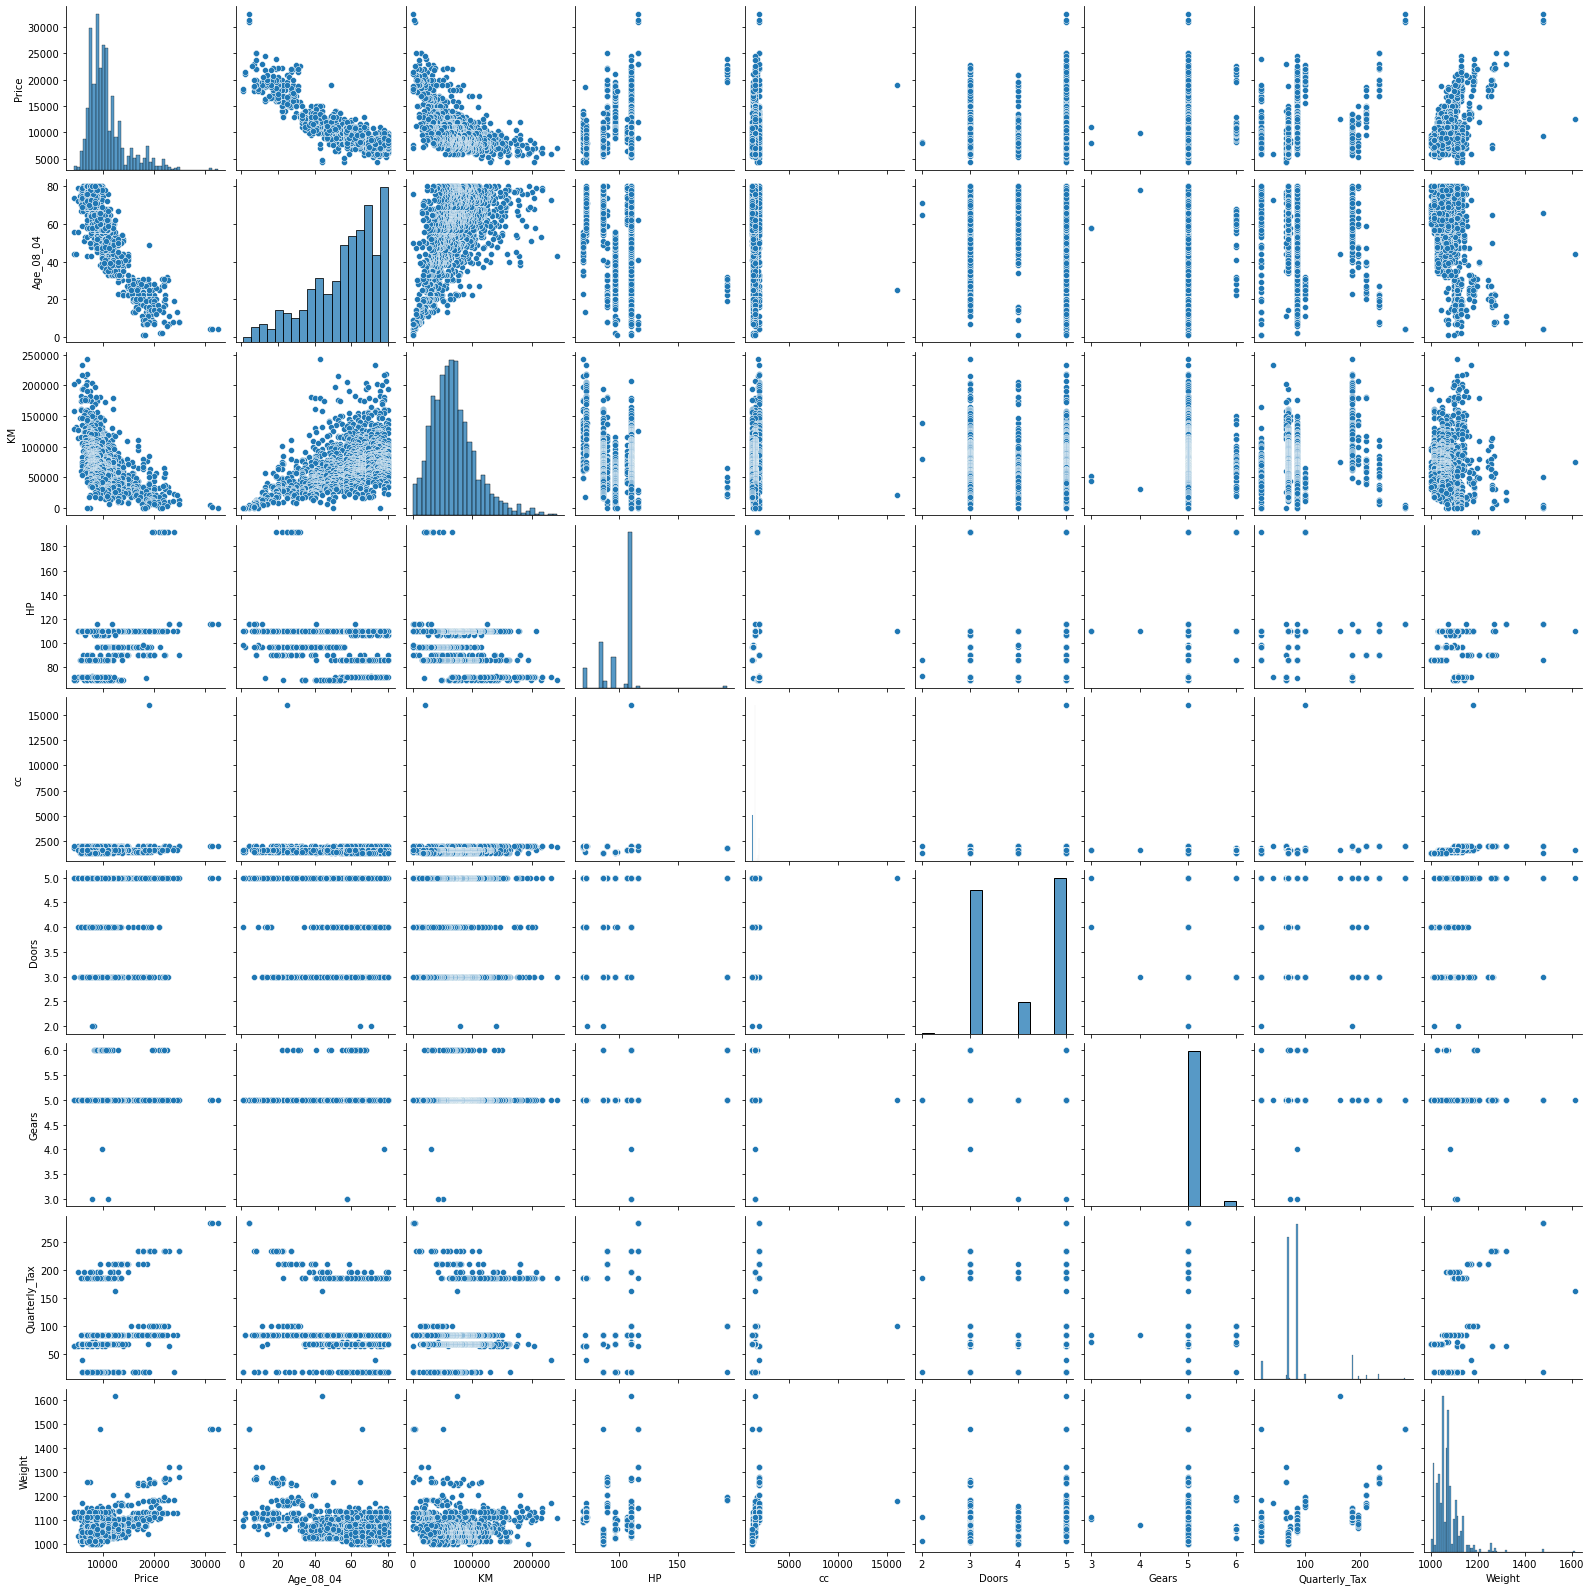

In [9]:
sns.pairplot(corolla_df.iloc[:,0:9])

In [18]:
corolla_df.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


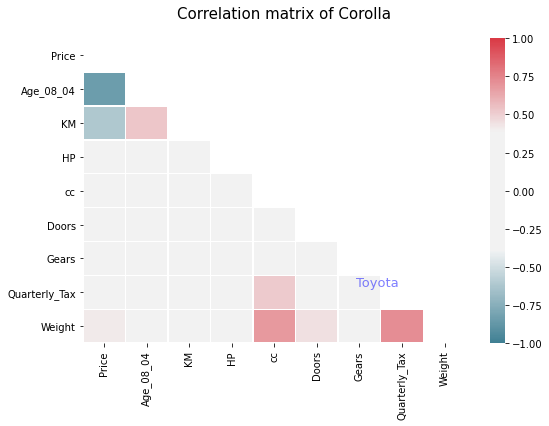

In [17]:
df = corolla_df.iloc[:,0:9]
corr = df.corr(method='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)
fig.suptitle('Correlation matrix of Corolla', fontsize=15)
ax.text(0.77, 0.2, 'Toyota', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='blue', alpha=0.5)
fig.tight_layout()

In [19]:
model1=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=corolla_df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:50:10   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
model_age = smf.ols('Price~Age_08_04',data=corolla_df).fit()
model_age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4758.
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:51:03   Log-Likelihood:                -12756.
No. Observations:                1436   AIC:                         2.552e+04
Df Residuals:                    1434   BIC:                         2.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.029e+04    146.097    138.908      0.000       2e+04    2.06e+04
Age_08_04   -170.9336      2.478    -68.978      0.000    -175.795    -166.073
==============================================================================
Omnibus:                      359.275   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2774.226
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                       9.541   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model_cd = smf.ols('Price~cc+Doors',data=corolla_df).fit()
model_cd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Fri, 26 Mar 2021   Prob (F-statistic):           1.15e-15
Time:                        10:56:37   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
cc             0.9597      0.221      4.340      0.000       0.526       1.393
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
model3 = smf.ols('Price~Age_08_04+Weight',data=corolla_df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     2959.
Date:                Fri, 26 Mar 2021   Prob (F-statistic):               0.00
Time:                        10:57:38   Log-Likelihood:                -12633.
No. Observations:                1436   AIC:                         2.527e+04
Df Residuals:                    1433   BIC:                         2.529e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3149.7074   1052.897      2.991      0.003    1084.324    5215.091
Age_08_04   -151.0391      2.577    -58.610      0.000    -156.094    -145.984
Weight        14.9482      0.911     16.417      0.000      13.162      16.734
==============================================================================
Omnibus:                      150.983   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              949.444
Skew:                          -0.249   Prob(JB):                    6.77e-207
Kurtosis:                       6.952   Cond. No.                     2.68e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [29]:
X = corolla_df[['Age_08_04','Weight']].values.reshape(-1,2)
Y = corolla_df['Price']
x = X[:, 0]
y = X[:, 1]
z = Y
x_pred = np.linspace(6, 24, 30)      
y_pred = np.linspace(0.93, 2.9, 30) 
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T
ols = LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)
r2 = model.score(X, Y)
print(r2*100)




80.50715736932419


In [48]:
fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

Text(0.5, 0.98, '$R^2 = 0.81$')

In [49]:
fig.tight_layout()